## Run the sections A, B, C, D, E, F sequentially. Then the main program is ready to run and conduct experiment.

## (A) The First 2 bunch of codes are to initialize the motion controller ESP 300

In [1]:
from pymeasure.instruments.newport import ESP300
from pymeasure.instruments import list_resources

import ftd2xx  # Thorlabs MFF101
import ftd2xx.defines as constants
from ftd2xx import listDevices, getDeviceInfoDetail

from time import sleep

## (B)

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## (C) The next bunch of code should be run to initialize the Spectrometer (PrincetonInstruments Lightfield Software) and loads the curve fitting code

In [20]:
from spectra import capture_photo,ration
capture_photo("start",2) #it starts the lightfield software


# from fit_code2 import ration
import pandas as pd
df = pd.DataFrame(columns=['D','PD','WD','FD','G','PG','WG','FG','2D','P2D','W2D','F2D','GD', '2DG'])
df.to_csv("fit.csv",index=False)
df2 = pd.DataFrame(columns=['power','time','gas','pressure','ratio','estimated','estimated_upper'])

df2.to_csv("plot_data.csv",index=False)


# (D) Establish connection with the ESP300 and Flipper Mirror

In [5]:

ctrl = ESP300("GPIB0::3::INSTR")
ctrl.data_bits=8
ctrl.baud_rate=19200
ctrl.StopBits=1
ctrl.read_termination='\r\n'
ctrl.write_termination='\r'

# (E) Record the position of the x,y,z axes of the motion controller

In [6]:
x = ctrl.x  # Our x-axis is motor 1 or y
y = ctrl.y  # Our y-axis is motor 2 or x
z = ctrl.phi  # 3
pos = [x.position, y.position, z.position]
print(pos)
print(x.enabled,y.enabled,z.enabled)

[7.19998, 4.99999, 3.99999]
True True True


## (F) Import the flipper mirror and Laser Power controlling package**

In [7]:
from flipper import mirror
mirror('off')
from pymeasure.instruments.lighthousephotonics import Sprout
laser_power = Sprout('COM1')
laser_power.adapter.connection.baud_rate = 19200
laser_power.adapter.connection.read_termination = '\r'
laser_power.adapter.connection.write_termination = '\r'
laser_power.power=0.01

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Main Program to begin the experiment
**Here the main experiment begins**

Initializing starts

Enter the (y1,x1) coordinate
8.2 5
Enter the (y2,x2) coordinate
9.7 5
Enter the step size of y, then x
.5 .5
[8.2 8.7 9.2 9.7]
[5.]

Patterning will be started within 10 seconds


Patterning Starts

 
 
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


C:\Users\labuser\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


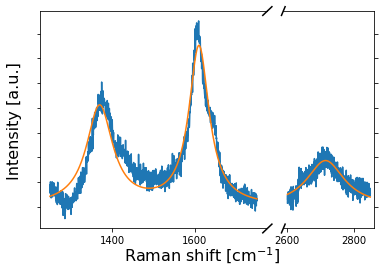

None
 
 
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


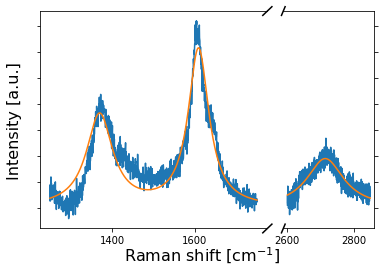

None
AI has started thinking !
 
 
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


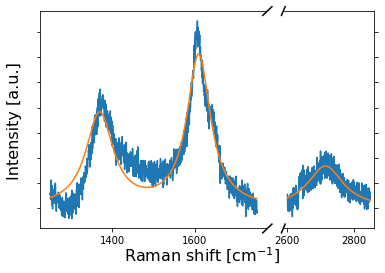

None
 
 
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


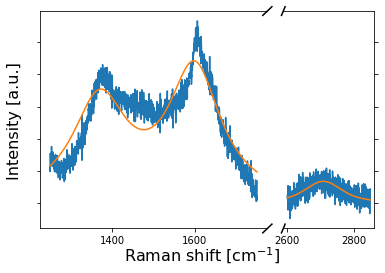

None


In [18]:
from __future__ import division
import pandas as pd

import time
import os
os.chdir("C:\\Users\\labuser")
df=pd.read_csv("dataset-2.csv")
df.head()
power_of_file=df["power"]
time_of_file=df["time"]

#initialize position
print("Initializing starts\n")

pos_x=[]
pos_y=[]
import numpy as np
p=2
p2=2
print("Enter the (y1,x1) coordinate")
co=[float(p) for p in input().split()]


print("Enter the (y2,x2) coordinate")
co1=[float(p2) for p2 in input().split()]



print("Enter the step size of y, then x")
s=2
step=[float(s) for s in input().split()]


pos_x=np.arange(co[0],co1[0]+step[0],step[0])
pos_y=np.arange(co[1],co1[1]+step[1],step[1])

        
print(pos_x)
print(pos_y)

position=[]
for i in range(len(pos_y)):
    for j in range(len(pos_x)):
        position.append([pos_x[j],pos_y[i]])



mirror('off') #make sure mirror is off
laser_power.power=0.01   #make sure laser power is down to 0.01 W
print("\nPatterning will be started within 10 seconds\n")
time.sleep(10)





print("\nPatterning Starts\n")

for i in range(len(pos_x)*len(pos_y)):
    
    import pandas as pd
    import math
    data2=pd.read_csv("dataset-2.csv")
    rto=data2["ratio"]
    y_unique=[]
    for m in rto:
        if m not in y_unique and m!=0 and  math.isnan(m)!=1:y_unique.append(m)

    number_of_unique_ratios=len(y_unique)
    
    if i==number_of_unique_ratios==2:print("AI has started thinking !")
    if i>=number_of_unique_ratios==2:
        import rpy2.robjects as robjects
        robjects.r('''
        suppressWarnings({suppressMessages({
          library(mlrMBO)
          library(ggplot2)
        })})

        ps = makeParamSet(
          makeIntegerParam("power", lower = 101, upper = 2000),
          makeIntegerParam("time", lower = 500, upper = 10000),
          makeDiscreteParam("gas", values = c("Argon")),
          makeIntegerParam("pressure", lower = 920, upper = 930)
        )

        ctrl = makeMBOControl(y.name = "ratio")
        ctrl = setMBOControlInfill(ctrl, opt = "focussearch", opt.focussearch.maxit = 10, opt.focussearch.points = 10000, crit = makeMBOInfillCritEI())

        data=read.csv("dataset-2.csv")
        data<-na.omit(data)
        suppressMessages({opt.state = initSMBO(par.set = ps, design = data, control = ctrl, minimize = FALSE, noisy = TRUE)})
        print("Proposed parameters:")
        prop = suppressWarnings({proposePoints(opt.state)})
        print(prop$prop.points)
        dummy_ratio=0
        cat("Expected value (upper bound):\n")
        cat(paste(prop$crit.components$mean, " (", prop$crit.components$mean + prop$crit.components$se, ")\n", sep = ""))
        x<-c(prop$prop.points,dummy_ratio,prop$crit.components$mean,prop$crit.components$mean + prop$crit.components$se)
        x2<-c(prop$prop.points)
        data_plot=read.csv("plot_data.csv")
        write.table(x2, file = "dataset-2.csv", sep = ",", append = TRUE, quote = FALSE,col.names = FALSE, row.names = FALSE)
        write.table(x, file = "plot_data.csv", sep = ",", append = TRUE, quote = FALSE,col.names = FALSE, row.names = FALSE)
        
        ''')
        
        
    df=pd.read_csv("dataset-2.csv")
    power_of_file=df["power"]
    time_of_file=df["time"]

    x.position=position[i][0]
    y.position=position[i][1]
    time.sleep(10)
    a=power_of_file[i]
#     b=float(a/1e3)
#     laser_power.power=b
    #laser_power.power=((a-2.7979)/0.4639)/1000
    laser_power.power=((a+10.719)/0.3355)/1000
    time.sleep(15)
    mirror('on') #irradiation begins
    
    
    t=time_of_file[i] 
    laser_time=float(t/1e3)
    time.sleep(laser_time+1) #exposure time
    
    mirror('off')
    time.sleep(5)
    laser_power.power=0.01
    time.sleep(4)
    
    #begin capturing spectra
    mirror("on")
    capture_photo("on",i)
    mirror("off")
    time.sleep(5)
    
    
        

**The following codes are some random stuff**

In [15]:
x.position=9.7
y.position=5
z.position=4

In [ ]:
mirror("off")

In [ ]:
print(position)

In [ ]:
print(position[0][0])